# DSC 10 Discussion Week 9


<img src="data/panda_eat.jpg" width="500">

#### Extra
- You can find additional help on these topics in the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html).
- [Here](https://ucsd-ets.github.io/dsc10-2020-fa/published/default/reference/babypandas-reference.pdf) is a pointer to that reference sheet we saw last time.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import babypandas as bpd
%matplotlib inline

import otter
grader = otter.Notebook()

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
    "livereveal", {
        'width': 1500,
        'height': 700,
        "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}


# Area Under the Curve

Area under the curve normally follows Chebychev's Bounds:

For all lists, and all numbers  z , the proportion of entries that are in the range "average  $\pm z$  SDs" is at least $1 - \frac{1}{z^{2}} $

In other words, we can say that at least $1-\frac{1}{z^2}$ of data from a sample must fall within $z$ standard deviations from the mean.

How is this useful? We can actually use it to find the what proportion of entries lie within a certain standard deviation which allows us to compute the area under a curve easily.

NOTE : Chebyshev's inequality holds for any shaped distribution!

### Question 0.1

What is the proportion of entries that are in the range average $\pm 1$ SD 

In [2]:
cheby_area_pm_1 = 1 - (1/(1**2)) # SOLUTION
cheby_area_pm_1

0.0

### Question 0.2

What is the proportion of entries that are in the range average $\pm 2$ SD 

In [3]:
cheby_area_pm_2 = 1 - (1/(2**2)) # SOLUTION
cheby_area_pm_2

0.75

### Question 0.3

What is the proportion of entries that are in the range average $\pm 3$ SD 

In [4]:
cheby_area_pm_3 = 1 - (1/(3**2)) # SOLUTION
cheby_area_pm_3

0.8888888888888888

## Area Under the Curve : Normal Distribution

In the case of a normal distribution the area under the curve does increase much more due to certain properties of the normal distribution. 
Let us explore what the same bounds look like under normal distributions with the help of scipy.stats. 

We will use the stats.norm.cdf function which gives us the cumulative distribution function till a certain point. So if I say stats.norm.cdf(1) it will give me the area between all the points to the left of 1 in a normal curve.

In general, are within $[a.b]$ is ```stats.norm.cdf(b) - stats.norm.cdf(a)```

### Question 0.4

What is the proportion of entries that are in the range average $\pm 1$ SD under the normal curve

In [5]:
normal_area_pm_1 = stats.norm.cdf(1) - stats.norm.cdf(-1) # SOLUTION
normal_area_pm_1

0.6826894921370859

### Question 0.5

What is the proportion of entries that are in the range average $\pm 2$ SD under the normal curve

In [6]:
normal_area_pm_2 = stats.norm.cdf(2) - stats.norm.cdf(-2) # SOLUTION
normal_area_pm_2

0.9544997361036416

### Question 0.6

What is the proportion of entries that are in the range average $\pm 3$ SD under the normal curve

In [7]:
normal_area_pm_3 = stats.norm.cdf(3) - stats.norm.cdf(-3) # SOLUTION
normal_area_pm_3

0.9973002039367398

In [8]:
# comparing AUC results

print(f"For ±1 SD --> Cheby. : {round(cheby_area_pm_1,3)}\t Normal : {round(normal_area_pm_1,3)}")
print(f"For ±2 SD --> Cheby. : {round(cheby_area_pm_2,3)}\t Normal : {round(normal_area_pm_2,3)}")
print(f"For ±3 SD --> Cheby. : {round(cheby_area_pm_3,3)}\t Normal : {round(normal_area_pm_3,3)}")

For ±1 SD --> Cheby. : 0.0	 Normal : 0.683
For ±2 SD --> Cheby. : 0.75	 Normal : 0.954
For ±3 SD --> Cheby. : 0.889	 Normal : 0.997


Although it is completely valid, Chebyshev's inequality provides a much weaker lower bound to the proportion of data that lies within $z$ standard deviations from the mean.

# Central Limit Theorem

The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

This is really useful since it can allow us to work with normal curves in most problems. 

Until now you have used this fact when computing the p value. When we say p value <= 0.05 we actually mean that our statistic is at least $\pm 2$ SDs away from the normal mean which is pretty rare under a normal curve. In any other curve under the Chebychev bounds $\pm 2$ SDs is much narrower (around 75%).

(array([22., 23., 25., 20., 20., 16., 21., 22., 15., 16.]),
 array([ 0.03442853,  2.03042666,  4.02642478,  6.0224229 ,  8.01842103,
        10.01441915, 12.01041727, 14.0064154 , 16.00241352, 17.99841165,
        19.99440977]),
 <a list of 10 Patch objects>)

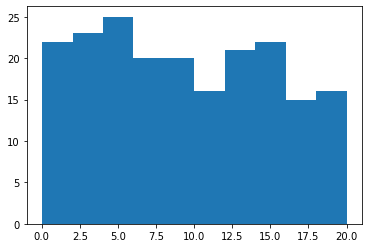

In [9]:
# Let us introduce a random uniformly distributed dataset

data = np.random.uniform(0, 20, 200)
plt.hist(data)

As you can see above we have a dataset that is clearly not normal. Let's try bootstrapping this and computing the mean

(array([ 12.,  19.,  66.,  90., 126.,  96.,  58.,  18.,  10.,   5.]),
 array([ 8.41647118,  8.64049736,  8.86452353,  9.08854971,  9.31257588,
         9.53660206,  9.76062823,  9.98465441, 10.20868059, 10.43270676,
        10.65673294]),
 <a list of 10 Patch objects>)

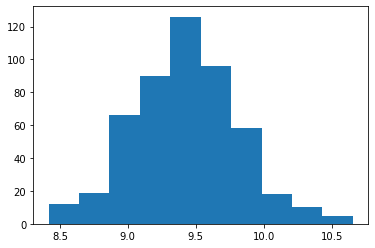

In [10]:
num_simulations = 500
sample_means = np.array([])
for _ in range(num_simulations):
    sample = np.random.choice(data, 200) # Note: Using .sample is better. I am working with a numpy array which is why I use this
    mean_of_sample = np.mean(sample)
    sample_means = np.append(sample_means, mean_of_sample)

plt.hist(sample_means)

This may be surprising, but our statistics are normally distributed!

This is extremely useful since we can compute the p-value even with non-normal data as the distribution of the statistics are normal (as a result of the CLT).

### Question 2.1

What is the p value if we have an observed statistic of 9?

In [11]:
p_value_with_obs_9 = np.mean(sample_means <= 9) # SOLUTION
p_value_with_obs_9

0.134

### Question 2.2

What is the p value if we have an observed statistic of 10?

In [12]:
p_value_with_obs_10 = np.mean(sample_means <= 10) # SOLUTION
p_value_with_obs_10

0.934

## Remember this dataset? Life expectancy data

This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [13]:
# load in all the data
life_expectancy = bpd.read_csv("data/Life Expectancy Data.csv")

# choose only data from 2015
recent_data = life_expectancy[life_expectancy.get("Year") == 2015]

recent_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


# Recall from last time...

### Plot the distribution of sample means
- Grab a sample
- Use bootstrapping to sample from the sample
- Compute the statistic for each bootstrapped sample
- Plot them all

## Population Mean

In [14]:
# compute population mean to compare

pop_data = recent_data.get('Life expectancy ')
pop_mean = pop_data.mean()
pop_mean

71.61693989071036

# Population Distribution

(array([ 1.,  0.,  1.,  1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,
         1.,  3.,  2.,  1.,  4.,  1.,  0.,  2.,  3.,  2.,  2.,  2.,  3.,
         1.,  4.,  1.,  5.,  6.,  2.,  1.,  1.,  2.,  4.,  5.,  3.,  0.,
         0.,  4.,  3.,  4.,  2.,  3.,  5.,  6., 12.,  6.,  8.,  9.,  4.,
         4.,  5.,  2.,  2.,  3.,  1.,  0.,  0.,  7.,  5.,  5.,  5.,  2.,
         1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]),
 array([51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5, 56. ,
        56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5, 61. , 61.5,
        62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5, 67. ,
        67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5,
        73. , 73.5, 74. , 74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5, 78. ,
        78.5, 79. , 79.5, 80. , 80.5, 81. , 81.5, 82. , 82.5, 83. , 83.5,
        84. , 84.5, 85. , 85.5, 86. , 86.5, 87. , 87.5, 88. , 88.5, 89. ]),
 <a list of 76 Patch objects>)

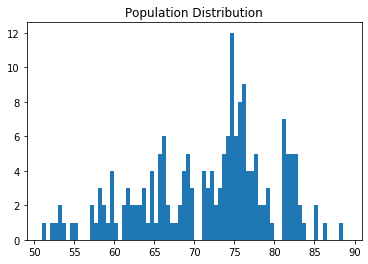

In [15]:
# Visualization help
def get_bins(array, bin_size=1):
    smallestNum = int(array.min())
    
    largestNum = int(array.max())
    upperLimit = largestNum + bin_size + 1
    
    return np.arange(smallestNum, upperLimit, bin_size)

plt.title("Population Distribution")
plt.hist(pop_data, bins=get_bins(pop_data,0.5))

## The population distribution is clearly not a normal distribution

# Distribution of Sample Means

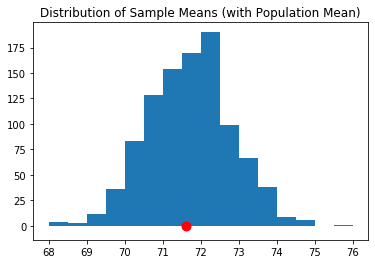

In [16]:
# Get a sample
num_samples = 60
collected = recent_data.sample(n=num_samples, replace=False)

# Bootstrap
sample_means = np.array([])

for i in range(1000):
    bootstrapped = collected.sample(num_samples,replace=True)
    boot_mean = bootstrapped.get('Life expectancy ').mean()
    sample_means = np.append(sample_means, boot_mean)
    
plt.title("Distribution of Sample Means (with Population Mean)")
plt.hist(sample_means, bins=get_bins(sample_means, 0.5))
plt.scatter(pop_mean, 0, color='red', s=80).set_zorder(2)

## However, the distribution of sample means is a normal distribution -- Thanks Central Limit Theorem!

# Bootstrapped Confidence Intervals


    Mean:	71.70729500000002

    Lower Percentile:	2.5
    Upper Percentile:	97.5

    Lower Bound:	69.62495833333335
    Upper Bound:	73.7667083333333

    Confidence Level:	95%
    


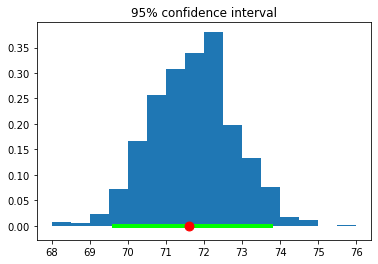

In [17]:
# compute the lower percentile given a confidence interval
def compute_lower_percentile(perc_conf):
    
    lower_perc = (100-perc_conf)/2
    
    return lower_perc

# compute the upper percentile given a confidence interval
def compute_upper_percentile(perc_conf):
    
    upper_perc = 100 - (100-perc_conf)/2 
    
    return upper_perc

def compute_ci(confidence_level, sample_means):

    # What is the mean we're estimating?
    mean = np.mean(sample_means) 

    # What are the percentiles?
    # Use the functions we made above
    lower_perc = compute_lower_percentile(confidence_level)
    upper_perc = compute_upper_percentile(confidence_level)

    # And then our lower and upper bounds?
    lower_bound = np.percentile(sample_means, lower_perc) 
    upper_bound = np.percentile(sample_means, upper_perc) 

    # Printing it out so we can easily see our results.
    print("""
    Mean:\t{}

    Lower Percentile:\t{}
    Upper Percentile:\t{}

    Lower Bound:\t{}
    Upper Bound:\t{}

    Confidence Level:\t{}%
    """.format(mean, lower_perc, upper_perc, lower_bound, upper_bound, confidence_level))
    
    return lower_bound, upper_bound

lower_bound, upper_bound = compute_ci(95, sample_means)

def plot_ci(ci, lower_bound, upper_bound, sample_means, pop_mean):
    plt.title(f"{ci}% confidence interval")
    plt.hist(sample_means, bins=get_bins(sample_means, 0.5), density=True)
    plt.scatter(pop_mean, 0, color='red', s=80).set_zorder(3)
    plt.plot([lower_bound, upper_bound], [0,0], color='lime', linewidth=4, zorder=2)
    
plot_ci(95, lower_bound, upper_bound, sample_means, pop_mean)

# A bit of recap info...

---
- Our **POPULATION DISTRIBUTION** is unknown, and can be any shape.


- A **SAMPLE DISTRIBUTION** should have a shape roughly similar to the population distribution.  
(provided that the sample was large enough and was properly randomized)


- A **SAMPLE MEAN** is just the mean of that sample distribution. This is just a single value.


- We can collect a handful of sample means (or fake it by bootstrapping)


- The **DISTRIBUTION OF SAMPLE MEANS** will resemble a normal distribution as the number of sample means increases.


- The **CENTER/MEAN** of the distribution of sample means should be similar to the true population mean.  
(provided that our original sample was proper)

## So what does this all mean...

---

Since we know that a normal distribution will arise as the number of resamples increases, then do we really need to go through all the effort of running a bootstrap?

Instead, we can rely on what we know about normal distributions!  The two defining features of a normal distribution are its center/mean and it's spread/standard deviation.

Let us compute the **mean** and **standard deviation** of our **DISTRIBUTION OF SAMPLE MEANS** and parameterize a normal curve!


Center (mean) : 71.707
Spread (std) : 1.092


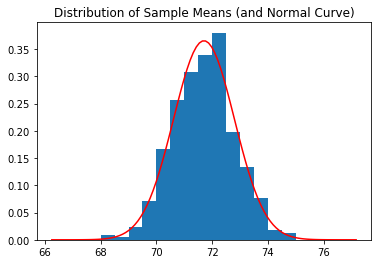

In [18]:
from scipy.stats import norm

# compute the mean
sample_dist_mean = np.mean(sample_means) # SOLUTION
sample_dist_std = np.std(sample_means) # SOLUTION

# set limits for plot
start = sample_dist_mean-5*sample_dist_std
stop = sample_dist_mean+5*sample_dist_std
x = np.linspace(start, stop, 100)

plt.title("Distribution of Sample Means (and Normal Curve)")

# plot histogram
plt.hist(sample_means, bins=get_bins(sample_means, 0.5), density=True)

# plot normal curve
plt.plot(x, norm.pdf(x, sample_dist_mean, sample_dist_std), c='r')

print(f"Center (mean) : {round(sample_dist_mean,3)}")
print(f"Spread (std) : {round(sample_dist_std,3)}")

### We now know the Mean and Standard Deviation of the normal curve associated with the distribution of sample means

As you can see above, this normal curve is centered at our sample mean (70.609 years) and has a standard deviation of 1.118 years.

However, we often want to standardize this distribution to be centered at 0 and have a standard deviation of 1.

Standardizing distributions make it very easy to compare multiple normal distributions that originally had vastly different centers and spreads. It also makes it really easy to compute different statistics about the distribution.

Let's take a look at how to do that now.

# Standard Normal Curve 

## CENTERING
- Mean = 0

In [19]:
# recall our sample of means
print(f"First 5 sample means : \t\t\t{sample_means[:5]}")
print(f"Center of sample distribution : \t{round(sample_dist_mean,3)}")
print(f"Std of sample distribution : \t\t{round(sample_dist_std,3)}")

First 5 sample means : 			[71.34833333 70.765      71.015      72.97166667 71.94166667]
Center of sample distribution : 	71.707
Std of sample distribution : 		1.092


In [20]:
# center the data to have mean = 0
centered_sample_means = sample_means - sample_dist_mean # SOLUTION
centered_sample_dist_mean = centered_sample_means.mean() # SOLUTION
centered_sample_dist_std = centered_sample_means.std() # SOLUTION

print(f"First 5 centered sample means : \t\t{centered_sample_means[:5]}")
print(f"Center of centered sample distribution : \t{round(centered_sample_dist_mean,3)}")
print(f"Std of centered sample distribution : \t\t{round(centered_sample_dist_std,3)}")

First 5 centered sample means : 		[-0.35896167 -0.942295   -0.692295    1.26437167  0.23437167]
Center of centered sample distribution : 	-0.0
Std of centered sample distribution : 		1.092


(array([0.01408451, 0.03822938, 0.10261569, 0.20523139, 0.28772636,
        0.30985915, 0.39235412, 0.30784708, 0.16700201, 0.10663984,
        0.05030181, 0.01408451, 0.00201207, 0.00201207]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
         2.5,  3. ,  3.5,  4. ]),
 <a list of 14 Patch objects>)

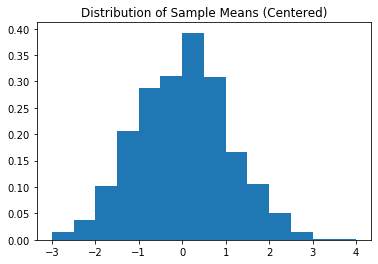

In [21]:
# visualize 
plt.title("Distribution of Sample Means (Centered)")
plt.hist(centered_sample_means, bins=get_bins(centered_sample_means, 0.5), density=True)

## SCALING
- Standard Deviation = 1

In [22]:
# scale the data to have std = 1
centered_and_scaled_means = centered_sample_means / sample_dist_std # SOLUTION
centered_and_scaled_sample_dist_mean = centered_and_scaled_means.mean() # SOLUTION
centered_and_scaled_sample_dist_std = centered_and_scaled_means.std() # SOLUTION

print(f"First 5 centered and scaled sample means : \t\t{centered_and_scaled_means[:5]}")
print(f"Center of centered and scaled sample distribution : \t{round(centered_and_scaled_sample_dist_mean,3)}")
print(f"Std of centered and scaled sample distribution : \t{round(centered_and_scaled_sample_dist_std,3)}")

First 5 centered and scaled sample means : 		[-0.32870231 -0.86286244 -0.63393667  1.15778904  0.21461486]
Center of centered and scaled sample distribution : 	-0.0
Std of centered and scaled sample distribution : 	1.0


(array([0.01408451, 0.03822938, 0.10261569, 0.20523139, 0.28772636,
        0.30985915, 0.39235412, 0.30784708, 0.16700201, 0.10663984,
        0.05030181, 0.01408451, 0.00201207, 0.00201207]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
         2.5,  3. ,  3.5,  4. ]),
 <a list of 14 Patch objects>)

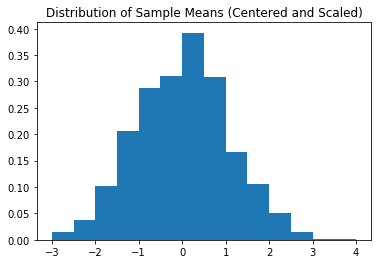

In [23]:
# visualize 
plt.title("Distribution of Sample Means (Centered and Scaled)")
plt.hist(centered_sample_means, bins=get_bins(centered_and_scaled_means, 0.5), density=True)

# Plot the normal curve

Center (mean) : -0.0
Spread (std) : 1.0


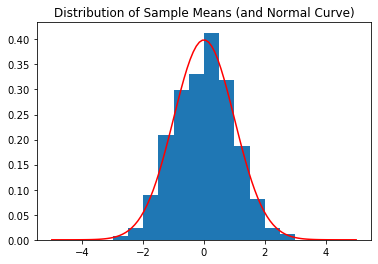

In [24]:
# get the mean and std

centered_and_scaled_sample_dist_mean = centered_and_scaled_sample_dist_mean # SOLUTION
centered_and_scaled_sample_dist_std = centered_and_scaled_sample_dist_std # SOLUTION

# set limits for plot
start = centered_and_scaled_sample_dist_mean-5*centered_and_scaled_sample_dist_std
stop = centered_and_scaled_sample_dist_mean+5*centered_and_scaled_sample_dist_std
x = np.linspace(start, stop, 100)

plt.title("Distribution of Sample Means (and Normal Curve)")

# plot histogram
plt.hist(centered_and_scaled_means, bins=get_bins(centered_and_scaled_means, 0.5), density=True)

# plot normal curve
plt.plot(x, norm.pdf(x, centered_and_scaled_sample_dist_mean, centered_and_scaled_sample_dist_std), c='r')

print(f"Center (mean) : {round(centered_and_scaled_sample_dist_mean,3)}")
print(f"Spread (std) : {round(centered_and_scaled_sample_dist_std,3)}")

Now that we are looking at a normal distribution, let's talk about standard units and area.

# Standard Units and Area
- Define $z(x) = \frac{x-\text{mean}}{\text{std}}$
- $z(x)$ maps $x$ to standard units 
    - If a distribution is roughly normal, then the area between $a$ and $b$ is approx. equal to the area between $z(a)$ and $z(b)$

## What proportion of countries have a life expectancy between 72 and 74 years?

### Using Standard Units

In [25]:
# define z(x)
def z(x):
    return (x - sample_dist_mean) / sample_dist_std # SOLUTION

In [26]:
# define age bounds
lower_age = 72
upper_age = 74

# comute standard units
lower_standard = z(lower_age) # SOLUTION
upper_standard = z(upper_age) # SOLUTION

print(f"Mean life expectancy : {round(sample_dist_mean,2)}")

print(f"LOWER : {lower_age} years --> {round(lower_standard,2)} standard units --> {round(lower_standard,2)} stdev's above the mean")
print(f"UPPER : {upper_age} years --> {round(upper_standard,2)} standard units --> {round(upper_standard,2)} stdev's above the mean")

Mean life expectancy : 71.71
LOWER : 72 years --> 0.27 standard units --> 0.27 stdev's above the mean
UPPER : 74 years --> 2.1 standard units --> 2.1 stdev's above the mean


In [27]:
# compute the area under the curve between
approx_prop_standard = stats.norm.cdf(upper_standard) - stats.norm.cdf(lower_standard) # SOLUTION
approx_prop_standard

0.37644858173370765

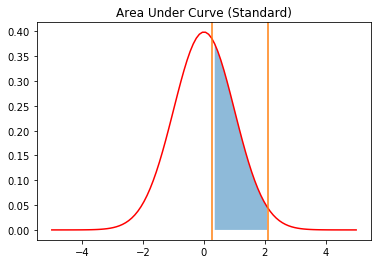

In [28]:
# plot area under curve

plt.title("Area Under Curve (Standard)")

start = centered_and_scaled_sample_dist_mean-5*centered_and_scaled_sample_dist_std
stop = centered_and_scaled_sample_dist_mean+5*centered_and_scaled_sample_dist_std
x = np.linspace(start, stop, 100)
y = norm.pdf(x, centered_and_scaled_sample_dist_mean, centered_and_scaled_sample_dist_std)

# plot normal curve
plt.plot(x, y, c='r')

ix = (x>=lower_standard) & (x<=upper_standard)
plt.fill_between(x[ix],y[ix],alpha=0.5)

plt.axvline(lower_standard,color='C1')
plt.axvline(upper_standard,color='C1')

### Using Sample Distribution

In [29]:
# compute proportion using distribution
approx_prop_dist = ((sample_means >= lower_age) & (sample_means <= upper_age)).mean() # SOLUTION
approx_prop_dist

0.394

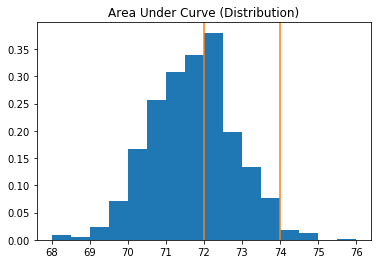

In [30]:
# plot area under curve

plt.title("Area Under Curve (Distribution)")

# plot histogram
plt.hist(sample_means, bins=get_bins(sample_means, 0.5), density=True)

ix = (x>=lower_age) & (x<=upper_age)
plt.fill_between(x[ix],y[ix],alpha=0.5)

plt.axvline(lower_age,color='C1')
plt.axvline(upper_age,color='C1')